In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
plt.style.use('seaborn-whitegrid')
plt.rcParams['image.cmap'] = 'brg'
import pandas as pd

# Clase kmedias

In [3]:
# Función que mide la distancia euclídea entre 2 vectores
def eucl(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class kmedias():
    np.random.seed(142)

    def __init__(self, K=5, max_iters=100, pasos=False):
        self.K = K
        self.max_iters = max_iters
        self.pasos = pasos

        # Lista vacía para considerar 
        self.grupos = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroides = []

    def pred(self, X):
        self.X = X
        self.datos, self.atributos = X.shape
        
        # Generar la selección aleatoria de los centroides 
        random = np.random.choice(self.datos, self.K, replace=False)
        self.centroides = [self.X[idx] for idx in random]

        # Optimizar el agrupamiento
        for _ in range(self.max_iters):
            # Asignar los datos al centroide más cercano
            self.grupos = self._crear_grupos(self.centroides)
            if self.pasos:
                self.plot()

            # Calcular nuevos centroides de cada grupo
            centroides_ant = self.centroides
            self.centroides = self._get_centroides(self.grupos)
            
            # Revisar si los grupos han cambiado
            if self._converge(centroides_ant, self.centroides):
                break

            if self.pasos:
                self.plot()

        # Etiquetar los datos por el grupo al que pertenecen
        return self._etiqueta_grupo(self.grupos)


    def _etiqueta_grupo(self, grupos):
        # cada elemento del grupo se etiqueta segun el grupo en el que queda
        etiquetas = np.empty(self.datos)

        for id_grupo, grupo in enumerate(grupos):
            for etq_dato in grupo:
                etiquetas[etq_dato] = id_grupo
        return etiquetas

    def _crear_grupos(self, centroides):
        # Crear los grupos asignando cada dato a su centroide más cercano
        grupos = [[] for _ in range(self.K)]
        for etq, dato in enumerate(self.X):
            etq_centroide = self._centroide_cerca(dato, centroides)
            grupos[etq_centroide].append(etq)
        return grupos

    def _centroide_cerca(self, dato, centroides):
        # Distancia del dato al centroide más cercano
        dist = [eucl(dato, centro) for centro in centroides]
        menor_etq = np.argmin(dist)
        return menor_etq

    def _get_centroides(self, grupos):
        # Crear los nuevos centroides como el promedio de los datos
        centroides = np.zeros((self.K, self.atributos))
        for grupo_id, grupo in enumerate(grupos):
            prom_grupo = np.mean(self.X[grupo], axis=0)
            centroides[grupo_id] = prom_grupo
        return centroides
    
    # Criterio de convergencia
    def _converge(self, centroides_ant, centroides):
        # Distancia entre los viejos y los nuevos centroides (para todos)
        dist = [eucl(centroides_ant[i], centroides[i]) for i in range(self.K)]
        return sum(dist) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(6, 6))

        for i, index in enumerate(self.grupos):
            punto = self.X[index].T
            ax.scatter(*punto)

        for punto in self.centroides:
            ax.scatter(*punto, marker="x", color='black', linewidth=2)

        plt.show()
    def centros(self):
        return self.centroides

# Ejemplos

## Ejemplo básico

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

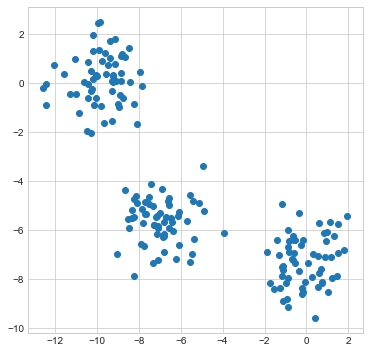

In [10]:
X, y = make_blobs(n_samples=180, random_state=9)
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:, 0], X[:, 1])
plt.show()

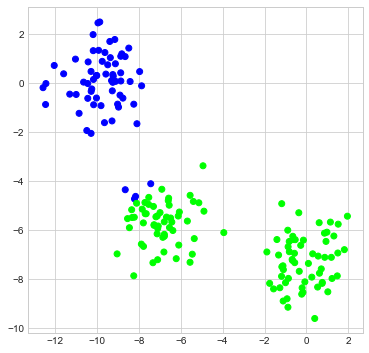

In [11]:
k = kmedias(K=2)
y_pred = k.pred(X)
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:, 0], X[:, 1], c = y_pred)
plt.show()

## Ejemplo problemas con la distribución de los datos

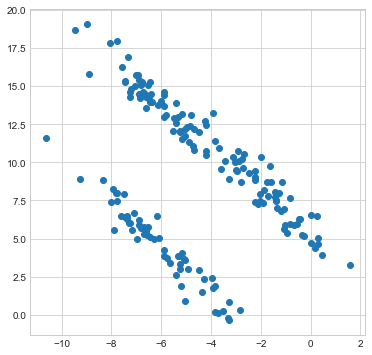

In [7]:
X, y = make_blobs(n_samples=180, random_state=25)
tr = [[-1, 1], [1, -2]]
X = np.dot(X, tr)
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:, 0], X[:, 1])
plt.show()

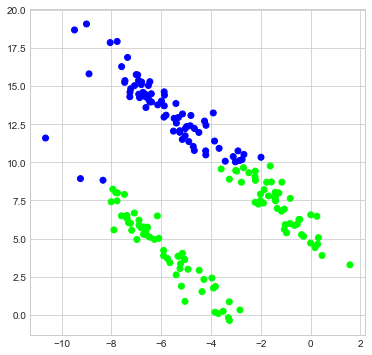

In [8]:
k = kmedias(K=2)
y_pred = k.pred(X)
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:, 0], X[:, 1], c = y_pred)
plt.show()

## Comparación con kmeans de sklearn

In [58]:
from sklearn.cluster import KMeans

In [250]:
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

In [251]:
%time
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.cluster_centers_

Wall time: 0 ns


array([[10.,  2.],
       [ 1.,  2.]])

In [257]:
%time
km = kmedias(K=2)
km.pred(X)
km.centros()

Wall time: 0 ns


array([[ 1.,  2.],
       [10.,  2.]])

# Charlie kmedias

In [12]:
os.chdir(r'D:\Escritorio\Académico\Trabajo de Grado')

In [13]:
image = cv2.imread("charlie.jpeg")

In [14]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

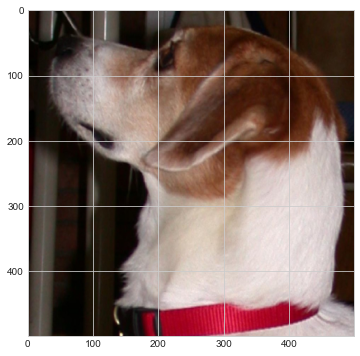

In [15]:
plt.figure(figsize=(6, 6))
plt.imshow(image)

In [45]:
image.shape

(500, 500, 3)

In [54]:
pixeles = image.reshape((-1, 3))
pixeles = np.float32(pixeles)
print(pixeles.shape)
pixeles

(250000, 3)


array([[ 31.,  12.,   6.],
       [ 36.,  17.,  11.],
       [ 35.,  18.,  11.],
       ...,
       [192., 180., 182.],
       [191., 181., 182.],
       [190., 180., 181.]], dtype=float32)

In [55]:
k = kmedias(K=4, max_iters=100, pasos = False) 
y_pred = k.pred(pixeles)
k.centros()

array([[ 36.94715881,  20.47426796,  11.42695808],
       [169.87606812, 146.23899841, 137.17411804],
       [111.34838104,  64.09971619,  57.20467758],
       [218.74732971, 204.33575439, 199.74085999]])

In [56]:
centros = np.uint8(k.centros())
centros

array([[ 36,  20,  11],
       [169, 146, 137],
       [111,  64,  57],
       [218, 204, 199]], dtype=uint8)

In [58]:
print(y_pred)
y_pred = y_pred.astype(int)
np.unique(y_pred)

[0. 0. 0. ... 3. 3. 3.]


array([0, 1, 2, 3])

In [62]:
etqs = y_pred.flatten()
charlie_kmedias = centros[etqs.flatten()]
print(charlie_kmedias)
charlie_kmedias = charlie_kmedias.reshape(image.shape)

[[ 36  20  11]
 [ 36  20  11]
 [ 36  20  11]
 ...
 [218 204 199]
 [218 204 199]
 [218 204 199]]


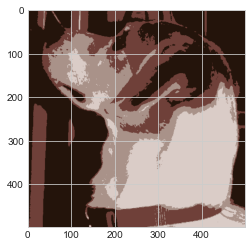

(500, 500, 3)

In [52]:
plt.imshow(charlie_kmedias)
plt.show()
charlie_kmedias.shape

# Charlie sklearn

In [37]:
kmeans = KMeans(n_clusters=4, random_state = 0).fit(pixeles)

In [38]:
centros = np.uint8(kmeans.cluster_centers_)
centros

array([[111,  63,  56],
       [169, 146, 137],
       [ 36,  20,  11],
       [218, 204, 199]], dtype=uint8)

In [39]:
print(y_pred)
y_pred = y_pred.astype(int)
np.unique(y_pred)

[0 0 0 ... 1 1 1]


array([0, 1])

In [40]:
etqs = y_pred.flatten()
charlie_kmedias = centros[etqs.flatten()]
charlie_kmedias = charlie_kmedias.reshape(image.shape)

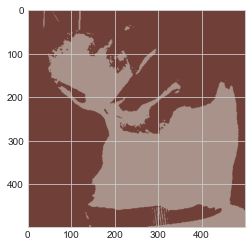

(500, 500, 3)

In [41]:
plt.imshow(charlie_kmedias)
plt.show()
charlie_kmedias.shape